In [1]:
import os

# Add /opt/homebrew/bin to the PATH
os.environ['PATH'] += ':/opt/homebrew/bin'


!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv



--2024-10-07 00:50:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.23’

laptops.csv.23      100%[===================>] 291.58K  --.-KB/s    in 0.05s   

2024-10-07 00:50:13 (5.26 MB/s) - ‘laptops.csv.23’ saved [298573/298573]



In [2]:
import pandas as pd

pd.__version__

'2.2.2'

In [2]:
import pandas as pd

df=pd.read_csv('laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

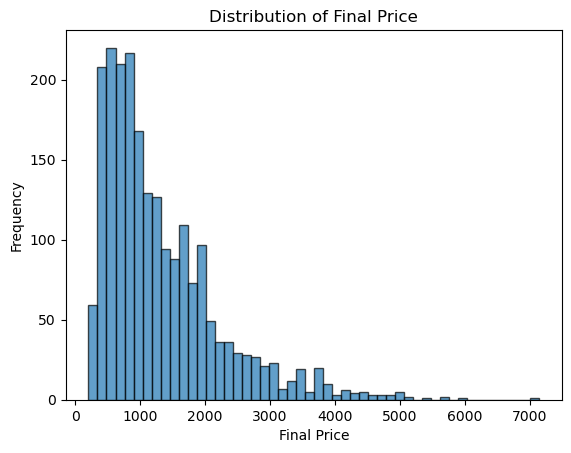

In [4]:
# EDA
# Look at the final_price variable. Does it have a long tail?

import matplotlib.pyplot as plt

# Plot a histogram for the 'final_price' variable
plt.hist(df['final_price'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

In [5]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
#missing values
missing_values= df.isnull().sum()
print(missing_values)

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64


In [7]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [8]:
import pandas as pd


median_value = df['ram'].median()

print(f"The median (50% percentile) of '{df['ram']}' is: {median_value}")

The median (50% percentile) of '0        8
1        8
2        8
3       16
4       16
        ..
2155    16
2156    16
2157    32
2158    16
2159    16
Name: ram, Length: 2160, dtype: int64' is: 16.0


In [9]:
df = df[['ram','storage','screen','final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [10]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [11]:
#applying log transformation to the final_price;

import numpy as np

# Apply log transformation
df['final_price'] = np.log1p(df['final_price'])  # log1p is used to avoid log(0) issue

df

/var/folders/hr/s9cbzdhd7sscw62lc5crt_tw0000gn/T/ipykernel_38535/495318473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_price'] = np.log1p(df['final_price'])  # log1p is used to avoid log(0) issue


,ram,storage,screen,final_price
0,8,512,15.6,6.917706
1,8,256,15.6,5.703782
2,8,256,15.6,6.672033
3,16,1000,15.6,7.090077
4,16,512,15.6,6.507293
...,...,...,...,...
2155,16,1000,17.3,7.901374
2156,16,1000,17.3,7.972807
2157,32,1000,17.3,8.131822
2158,16,1000,13.4,7.550130


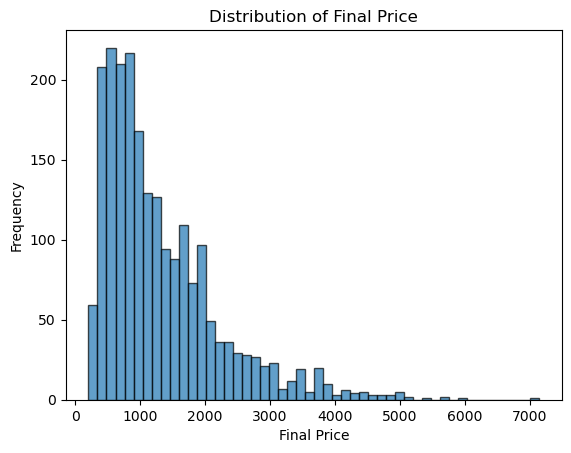

In [11]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'final_price' variable
plt.hist(df['final_price'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

In [35]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Use the same code as in the lectures

# Question 3
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?
# Options:
# #
# With 0
# With mean
# Both are equally good

In [36]:
# fillna using mean
df_mean = df.copy()
# Find the most frequent value (mode) of the column, e.g., 'Brand'
most_frequent_value = df_mean['screen'].mode()[0]

# Fill missing values in the 'Screen' column with the most frequent value
df_mean['screen'] = df_mean['screen'].fillna(most_frequent_value)

# Verify that missing values are filled
print(df_mean['screen'].isnull().sum())

0


In [12]:
# fillna using 0

df_zero = df.copy()

# Fill missing values in the 'Screen' column with the most frequent value
df_zero['screen'] = df_zero['screen'].fillna(0)

# Verify that missing values are filled
print(df_zero.isnull().sum())

ram            0
storage        0
screen         0
final_price    0
dtype: int64


In [38]:
# ##splitting dataset using Alexey's method

# import numpy as np
# import pandas as pd

# # Assuming df is your original dataset
# n = len(df_zero)
# idx = np.arange(n)
# np.random.shuffle(idx)

# # Define the sizes for train, validation, and test sets
# train_ratio = 0.6
# val_ratio = 0.2
# test_ratio = 0.2

# n_train = int(train_ratio * n)
# n_val = int(val_ratio * n)

# # Get indices for each split
# train_idx = idx[:n_train]
# val_idx = idx[n_train:n_train + n_val]
# test_idx = idx[n_train + n_val:]

# # Split the dataset
# df_train = df.iloc[train_idx]
# df_val = df.iloc[val_idx]
# df_test = df.iloc[test_idx]

# print(len(df_train)) #1296
# print(len(df_val)) #432
# print(len(df_val)) #432

### regression using nulls filled with mean

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Define the feature matrix X and the target variable y
X = df_mean[['ram', 'storage', 'screen']]
y = df_mean['final_price']

# First, split the data into training (60%) and remaining (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then, split the remaining 40% into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the training, validation, and testing sets
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((1296, 3), (432, 3), (432, 3)), ((1296,), (432,), (432,)))

In [40]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Construct the formula for the linear regression model
formula = f"final_price = {intercept:.2f} + {coefficients[0]:.2f} * RAM + {coefficients[1]:.2f} * Storage + {coefficients[2]:.2f} * Screen"

formula

'final_price = 6.85 + 0.03 * RAM + 0.00 * Storage + -0.05 * Screen'

In [41]:
# Calculate the R-squared score for the training, validation, and test sets for mean filled screens
r2_train = model.score(X_train, y_train)
r2_val = model.score(X_val, y_val)
r2_test = model.score(X_test, y_test)

# Print the R-squared scores
r2_train, r2_val, r2_test

(0.5708530193450129, 0.5624274503080723, 0.4233631684965852)

### regression using nulls filled with 0

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Define the feature matrix X and the target variable y
X = df_zero[['ram', 'storage', 'screen']]
y = df_zero['final_price']

# First, split the data into training (60%) and remaining (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then, split the remaining 40% into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the training, validation, and testing sets
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((1296, 3), (432, 3), (432, 3)), ((1296,), (432,), (432,)))

In [43]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Construct the formula for the linear regression model
formula = f"final_price = {intercept:.2f} + {coefficients[0]:.2f} * RAM + {coefficients[1]:.2f} * Storage + {coefficients[2]:.2f} * Screen"

formula

'final_price = 6.72 + 0.03 * RAM + 0.00 * Storage + -0.04 * Screen'

In [44]:
# Calculate the R-squared score for the training, validation, and test sets for the 0 filled screens
r2_train = model.score(X_train, y_train)
r2_val = model.score(X_val, y_val)
r2_test = model.score(X_test, y_test)

# Print the R-squared scores
r2_train, r2_val, r2_test

(0.5710274492675208, 0.564488151276552, 0.42479989854138844)

In [45]:
# Question 4
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
# If there are multiple options, select the smallest r.

In [13]:
import numpy as np
# Shuffle the dataset
n = len(df_zero)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_zero = df_zero.iloc[idx].reset_index(drop=True)

# Split the dataset
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df_zero.iloc[:n_train].reset_index(drop=True)
df_val = df_zero.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test = df_zero.iloc[n_train + n_val:].reset_index(drop=True)

# Separate the target variable
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values

# Remove the target variable from the features
del df_train['final_price']
del df_val['final_price']

# Fill missing values with 0
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)

# Convert DataFrames to NumPy arrays
X_train = df_train.values
X_val = df_val.values

# Define the regularized linear regression function
def train_linear_regression_reg(X, y, r):
    X = np.column_stack([np.ones(len(X)), X])
    reg = r * np.eye(X.shape[1])
    reg[0, 0] = 0  # Do not regularize the intercept
    XTX = X.T.dot(X) + reg
    XTy = X.T.dot(y)
    w = np.linalg.solve(XTX, XTy)
    return w

# Define RMSE function
def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Try different regularization parameters
regularization_params = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

for r in regularization_params:
    # Train the model
    w = train_linear_regression_reg(X_train, y_train, r)

    # Prepare validation data with bias term
    X_val_aug = np.column_stack([np.ones(len(X_val)), X_val])

    # Make predictions on the validation set
    y_pred = X_val_aug.dot(w)

    # Compute RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append((r, round(score, 2)))

    print(f"r = {r}: RMSE = {round(score, 2)}")

r = 0: RMSE = 597.36
r = 0.01: RMSE = 597.36
r = 0.1: RMSE = 597.36
r = 1: RMSE = 597.36
r = 5: RMSE = 597.36
r = 10: RMSE = 597.36
r = 100: RMSE = 597.34


In [14]:
# Find the r with the lowest RMSE
best_r, best_score = min(rmse_scores, key=lambda x: x[1])
print(f"Best r: {best_r} with RMSE: {best_score}")

Best r: 100 with RMSE: 597.34


In [47]:
# Question 5
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
# What's the value of std?

# 19.176
# 29.176
# 39.176
# 49.176
# Note: Standard deviation shows how different the values are. If it's low, then all values 
# are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [32]:
def rmse(y,y_pred):
    error=y-y_pred
    se=error **2
    mse=se.mean()
    return np.sqrt(mse)

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# List of seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X = df_zero[['ram', 'storage', 'screen']]
y = df_zero['final_price']

# Initialize a list to store RMSE scores for each seed
rmse_scores_seed = []

# Loop through each seed and perform the train/val/test split, then train and evaluate the model
for seed in seed_values:
    # Split the data with the given seed
    # First, split the data into training (60%) and remaining (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    
    # Then, split the remaining 40% into validation (20%) and test (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    
    # Train a linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the validation set and calculate RMSE
    y_pred_val = model.predict(X_val)
    rmse_calc= rmse(y_val, y_pred_val)
    # rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))  # RMSE using square root
    rmse_scores_seed.append(round(rmse_calc, 2))

# Calculate the standard deviation of the RMSE scores
std = round(np.std(rmse_scores_seed), 3)

# Print the sizes of the training, validation, and testing sets
print(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)
# Return all the RMSE scores and the standard deviation
rmse_scores_seed, std

(1296, 3) (432, 3) (432, 3)


([594.97,
  566.04,
  634.21,
  571.4,
  618.23,
  534.85,
  604.49,
  666.14,
  586.24,
  622.51],
 35.825)

In [24]:
df_zero

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [15]:
y_pred_val

array([1189.73158473, 1756.43329998,  832.29856434, 1756.43329998,
        837.13693525, 1318.23384346, 1026.05459328, 1694.12917454,
        638.54253539, 2469.15329032, 1127.29879713,  868.41766012,
       1255.92971802, 2469.15329032,  868.41766012, 2469.15329032,
       2453.57725896, 1245.15432154, 2469.15329032, 1255.92971802,
        329.84894408, 2402.95515704,  728.10471572,  638.54253539,
        868.41766012, 2469.15329032, 1694.12917454,  638.54253539,
       1748.6452843 , 1255.92971802,  638.54253539,  868.41766012,
        700.84666084,  485.60925769, 1756.43329998,  930.72178557,
       1255.92971802,  638.54253539,  868.41766012, 2453.57725896,
       1756.43329998,  930.72178557, 1306.61711665, 1245.15432154,
       2402.95515704, 2453.57725896,  638.54253539,  638.54253539,
        700.84666084,  728.10471572, 1345.49189834,  868.41766012,
       4901.57519651, 1748.6452843 , 1307.45844699, 1240.35368665,
        700.84666084, 1255.92971802,  638.54253539,  868.41766

In [16]:
y_val

445      889.00
1995    1999.00
1205     655.34
2068     644.39
1617    1032.00
         ...   
2049    1659.24
881      764.34
476     3099.00
712      329.95
1096     529.90
Name: final_price, Length: 432, dtype: float64

(1296, 3) (432, 3) (432, 3)
[0.43, 0.44, 0.47, 0.43, 0.46, 0.45, 0.43, 0.46, 0.46, 0.46] 0.014


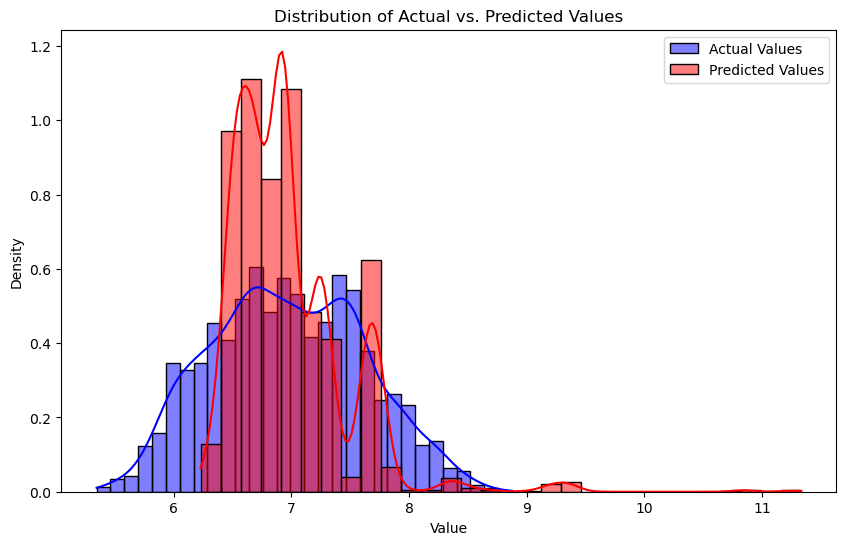

In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# List of seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define features and target variable
X = df_zero[['ram', 'storage', 'screen']]
y = df_zero['final_price']

# Initialize lists to store RMSE scores and all actual/predicted values
rmse_scores_seed = []
all_y_val = []
all_y_pred_val = []

for seed in seed_values:
    # Split the data with the given seed
    # First, split the data into training (60%) and remaining (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    
    # Then, split the remaining 40% into validation (20%) and test (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    
    # Train a linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and calculate RMSE
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_scores_seed.append(round(rmse, 2))

    # Store actual and predicted values
    all_y_val.extend(y_val.tolist())
    all_y_pred_val.extend(y_pred_val.tolist())

std = round(np.std(rmse_scores_seed), 3)

# Print the sizes of the training, validation, and testing sets
print(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)
# Return all the RMSE scores and the standard deviation
print(rmse_scores_seed, std)

# Convert lists to pandas Series for plotting
all_y_val_series = pd.Series(all_y_val, name='Actual Values')
all_y_pred_val_series = pd.Series(all_y_pred_val, name='Predicted Values')

# Plot histograms of actual and predicted values
plt.figure(figsize=(10, 6))
sns.histplot(all_y_val_series, color='blue', label='Actual Values', kde=True, stat="density", bins=30)
sns.histplot(all_y_pred_val_series, color='red', label='Predicted Values', kde=True, stat="density", bins=30, alpha=0.5)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.show()

In [34]:
# Question 6
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [15]:
# Shuffle the dataset with seed 9
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

# Split the dataset
df_train = df_shuffled.iloc[:n_train].reset_index(drop=True)
df_val = df_shuffled.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test = df_shuffled.iloc[n_train + n_val:].reset_index(drop=True)

# Combine training and validation datasets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = df_full_train['final_price'].values
y_test = df_test['final_price'].values

# Remove the target variable from the features
del df_full_train['final_price']
del df_test['final_price']

# Fill missing values with 0
df_full_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Convert DataFrames to NumPy arrays
X_full_train = df_full_train.values
X_test = df_test.values

# Train the model with r=0.001
w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Prepare test data with bias term
X_test_aug = np.column_stack([np.ones(len(X_test)), X_test])

# Make predictions on the test set
y_pred = X_test_aug.dot(w)

# Compute RMSE
score = rmse(y_test, y_pred)
score_rounded = round(score, 2)
print(f"Test RMSE: {score_rounded}")

Test RMSE: 608.61
